In [1]:
# Importing the necessary libraries 
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# Displaying the header of the train data
data_Df = pd.read_csv('https://www.ee.iitb.ac.in/~asethi/Dump/DataKPCA.csv')
data_Df.head()

,x1,x2,x3,x4,x5,x6,x7
0,2.596641,15.263178,-46.289607,-10.993265,-2.266729,1.935832,2.039688
1,3.096286,14.784802,-48.175614,-8.799362,-2.220871,1.851201,1.921974
2,3.360246,14.774917,-49.471841,-9.030501,-1.760447,1.753114,2.041933
3,2.214819,15.027394,-43.200400,-13.565001,-2.643018,2.200463,2.141847
4,3.398576,15.115756,-49.416644,-6.857672,-2.025936,1.788085,1.875540


In [3]:
print(data_Df.shape)

(190, 7)


In [4]:
# Printing the datatypes of each columns of the dataset
print(data_Df.dtypes)

x1    float64
x2    float64
x3    float64
x4    float64
x5    float64
x6    float64
x7    float64
dtype: object


In [5]:
arr = np.array(data_Df)
# print(arr)


In [6]:
# Printing the number of unique vales and null values in each column of the train dataset
for c in data_Df.columns.values:
  val_len = len(pd.unique(data_Df[c]))
  print(c + ' has ' + str(val_len) + ' unique values and is of type ' + str(data_Df[c].dtypes) + ' and has ' + str(data_Df[c].isnull().sum()) + ' null values')

x1 has 190 unique values and is of type float64 and has 0 null values
x2 has 190 unique values and is of type float64 and has 0 null values
x3 has 190 unique values and is of type float64 and has 0 null values
x4 has 190 unique values and is of type float64 and has 0 null values
x5 has 190 unique values and is of type float64 and has 0 null values
x6 has 190 unique values and is of type float64 and has 0 null values
x7 has 190 unique values and is of type float64 and has 0 null values


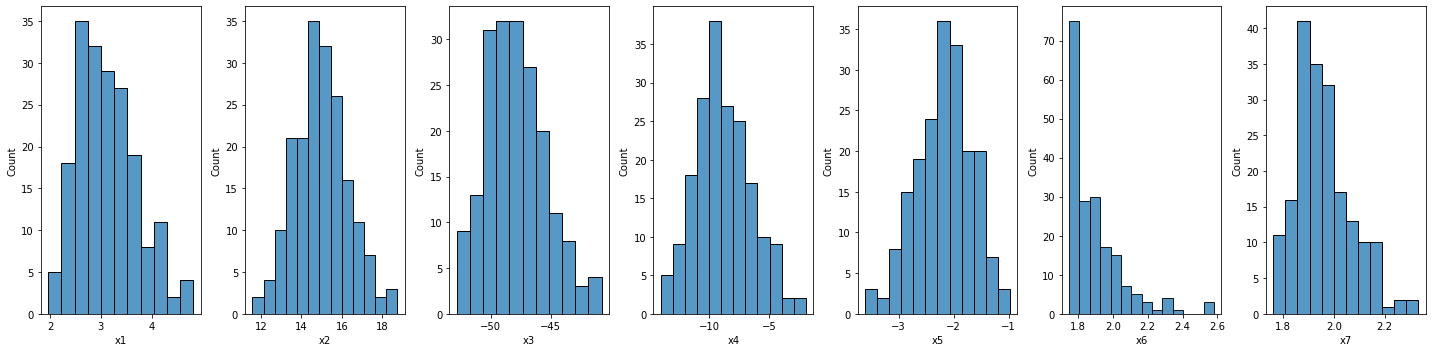

In [7]:
# Plotting histograms
fig, ax = plt.subplots(1, 7, figsize=(20,5))
sns.histplot(data_Df.x1, ax=ax[0])
sns.histplot(data_Df.x2, ax=ax[1])
sns.histplot(data_Df.x3, ax=ax[2])
sns.histplot(data_Df.x4, ax=ax[3])
sns.histplot(data_Df.x5, ax=ax[4])
sns.histplot(data_Df.x6, ax=ax[5])
sns.histplot(data_Df.x7, ax=ax[6])
plt.tight_layout()
plt.show()

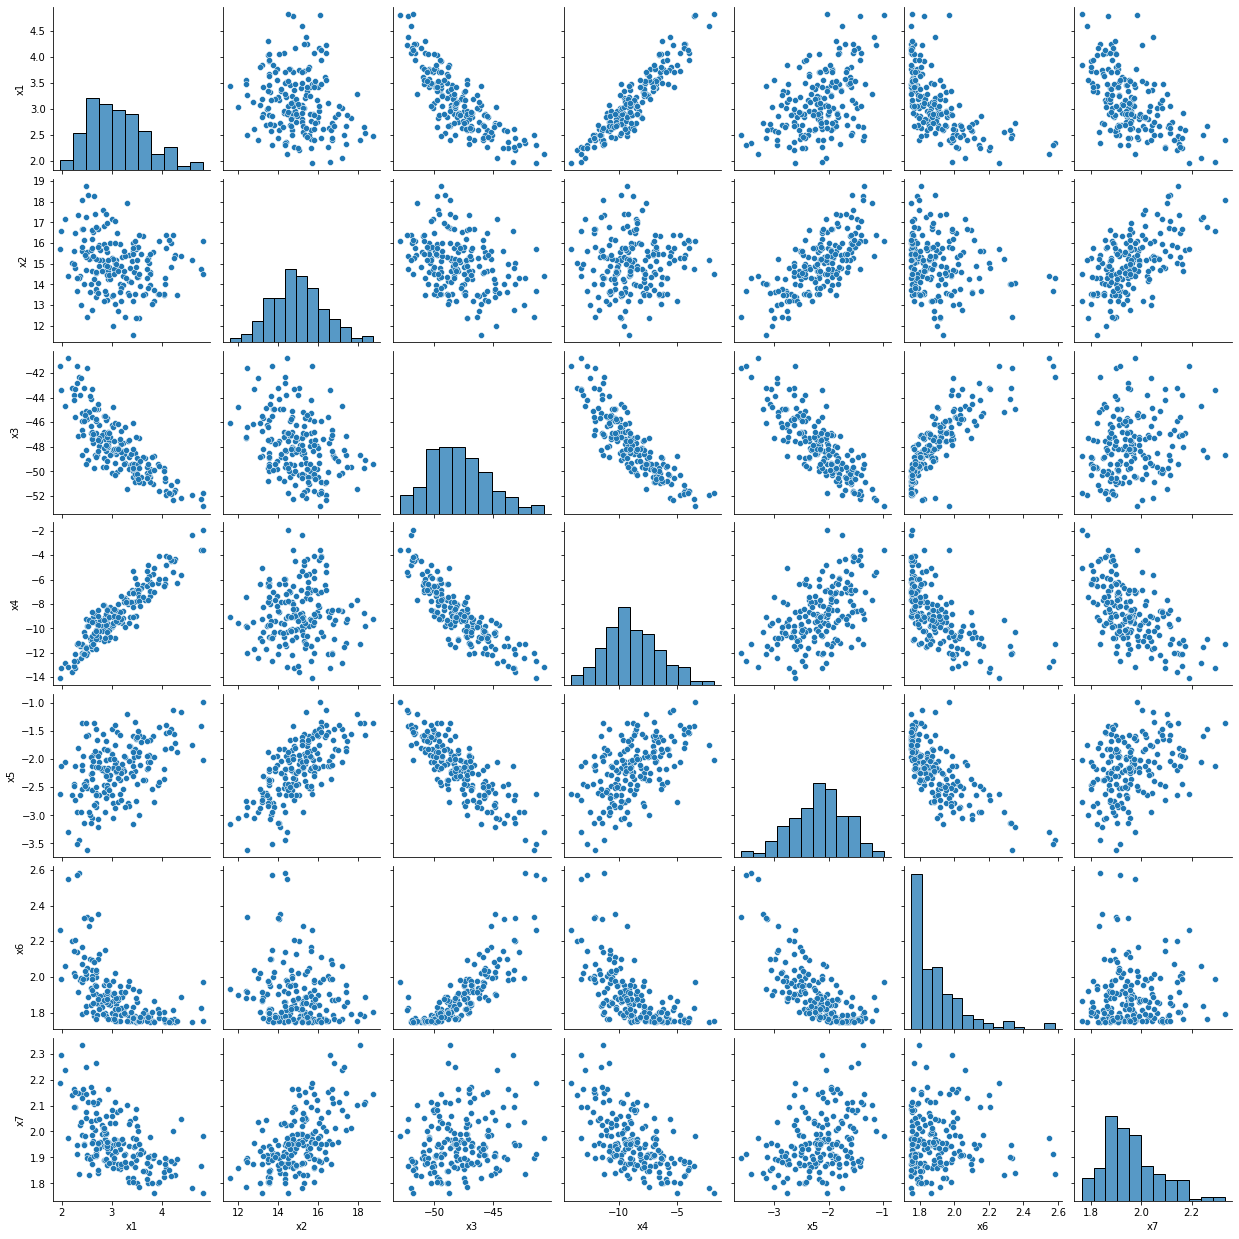

In [9]:
# Scatter plots
sns.pairplot(data_Df)
# to show
plt.show()

In [10]:
# normalizing the features
from sklearn.preprocessing import StandardScaler
df_scale = StandardScaler().fit_transform(data_Df) 
print(df_scale.mean())
print(df_scale.std())

3.0184710203342604e-16
1.0


Variance explained versus KPCA dimensions for up to 10 dimensions

For linear kernel

Text(0, 0.5, 'cumulative explained variance')

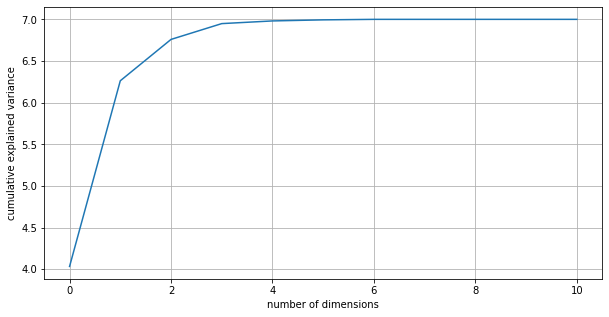

In [11]:
from sklearn.decomposition import KernelPCA
for i in range(1,12):
  kpca_transf= KernelPCA(n_components=i,kernel='linear').fit_transform(df_scale.data)
  variance = np.var(kpca_transf, axis=0)
  cum_var = (np.cumsum(variance))
plt.figure(figsize = (10,5))
plt.plot(cum_var)
plt.grid()
plt.xlabel('number of dimensions')
plt.ylabel('cumulative explained variance')

For poly kernel

Text(0, 0.5, 'cumulative explained variance')

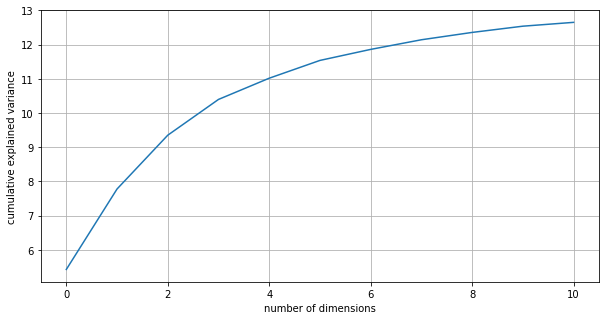

In [12]:
for i in range(1,12):
  kpca_transf= KernelPCA(n_components=i,kernel='poly').fit_transform(df_scale.data)
  variance = np.var(kpca_transf, axis=0)
  cum_var = (np.cumsum(variance))
plt.figure(figsize = (10,5))
plt.plot(cum_var)
plt.grid()
plt.xlabel('number of dimensions')
plt.ylabel('cumulative explained variance')

## References
https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html

https://www.analyticsvidhya.com/blog/2020/07/types-of-feature-transformation-and-scaling/

https://stackoverflow.com/questions/29611842/scikit-learn-kernel-pca-explained-variance

